In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv(r'E:\project_2\working\forest_cover_prediction\train.csv')

In [5]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [8]:
df.shape

(15120, 56)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [10]:
df["Cover_Type"].unique()

array([5, 2, 1, 7, 3, 6, 4])

Data Visualization

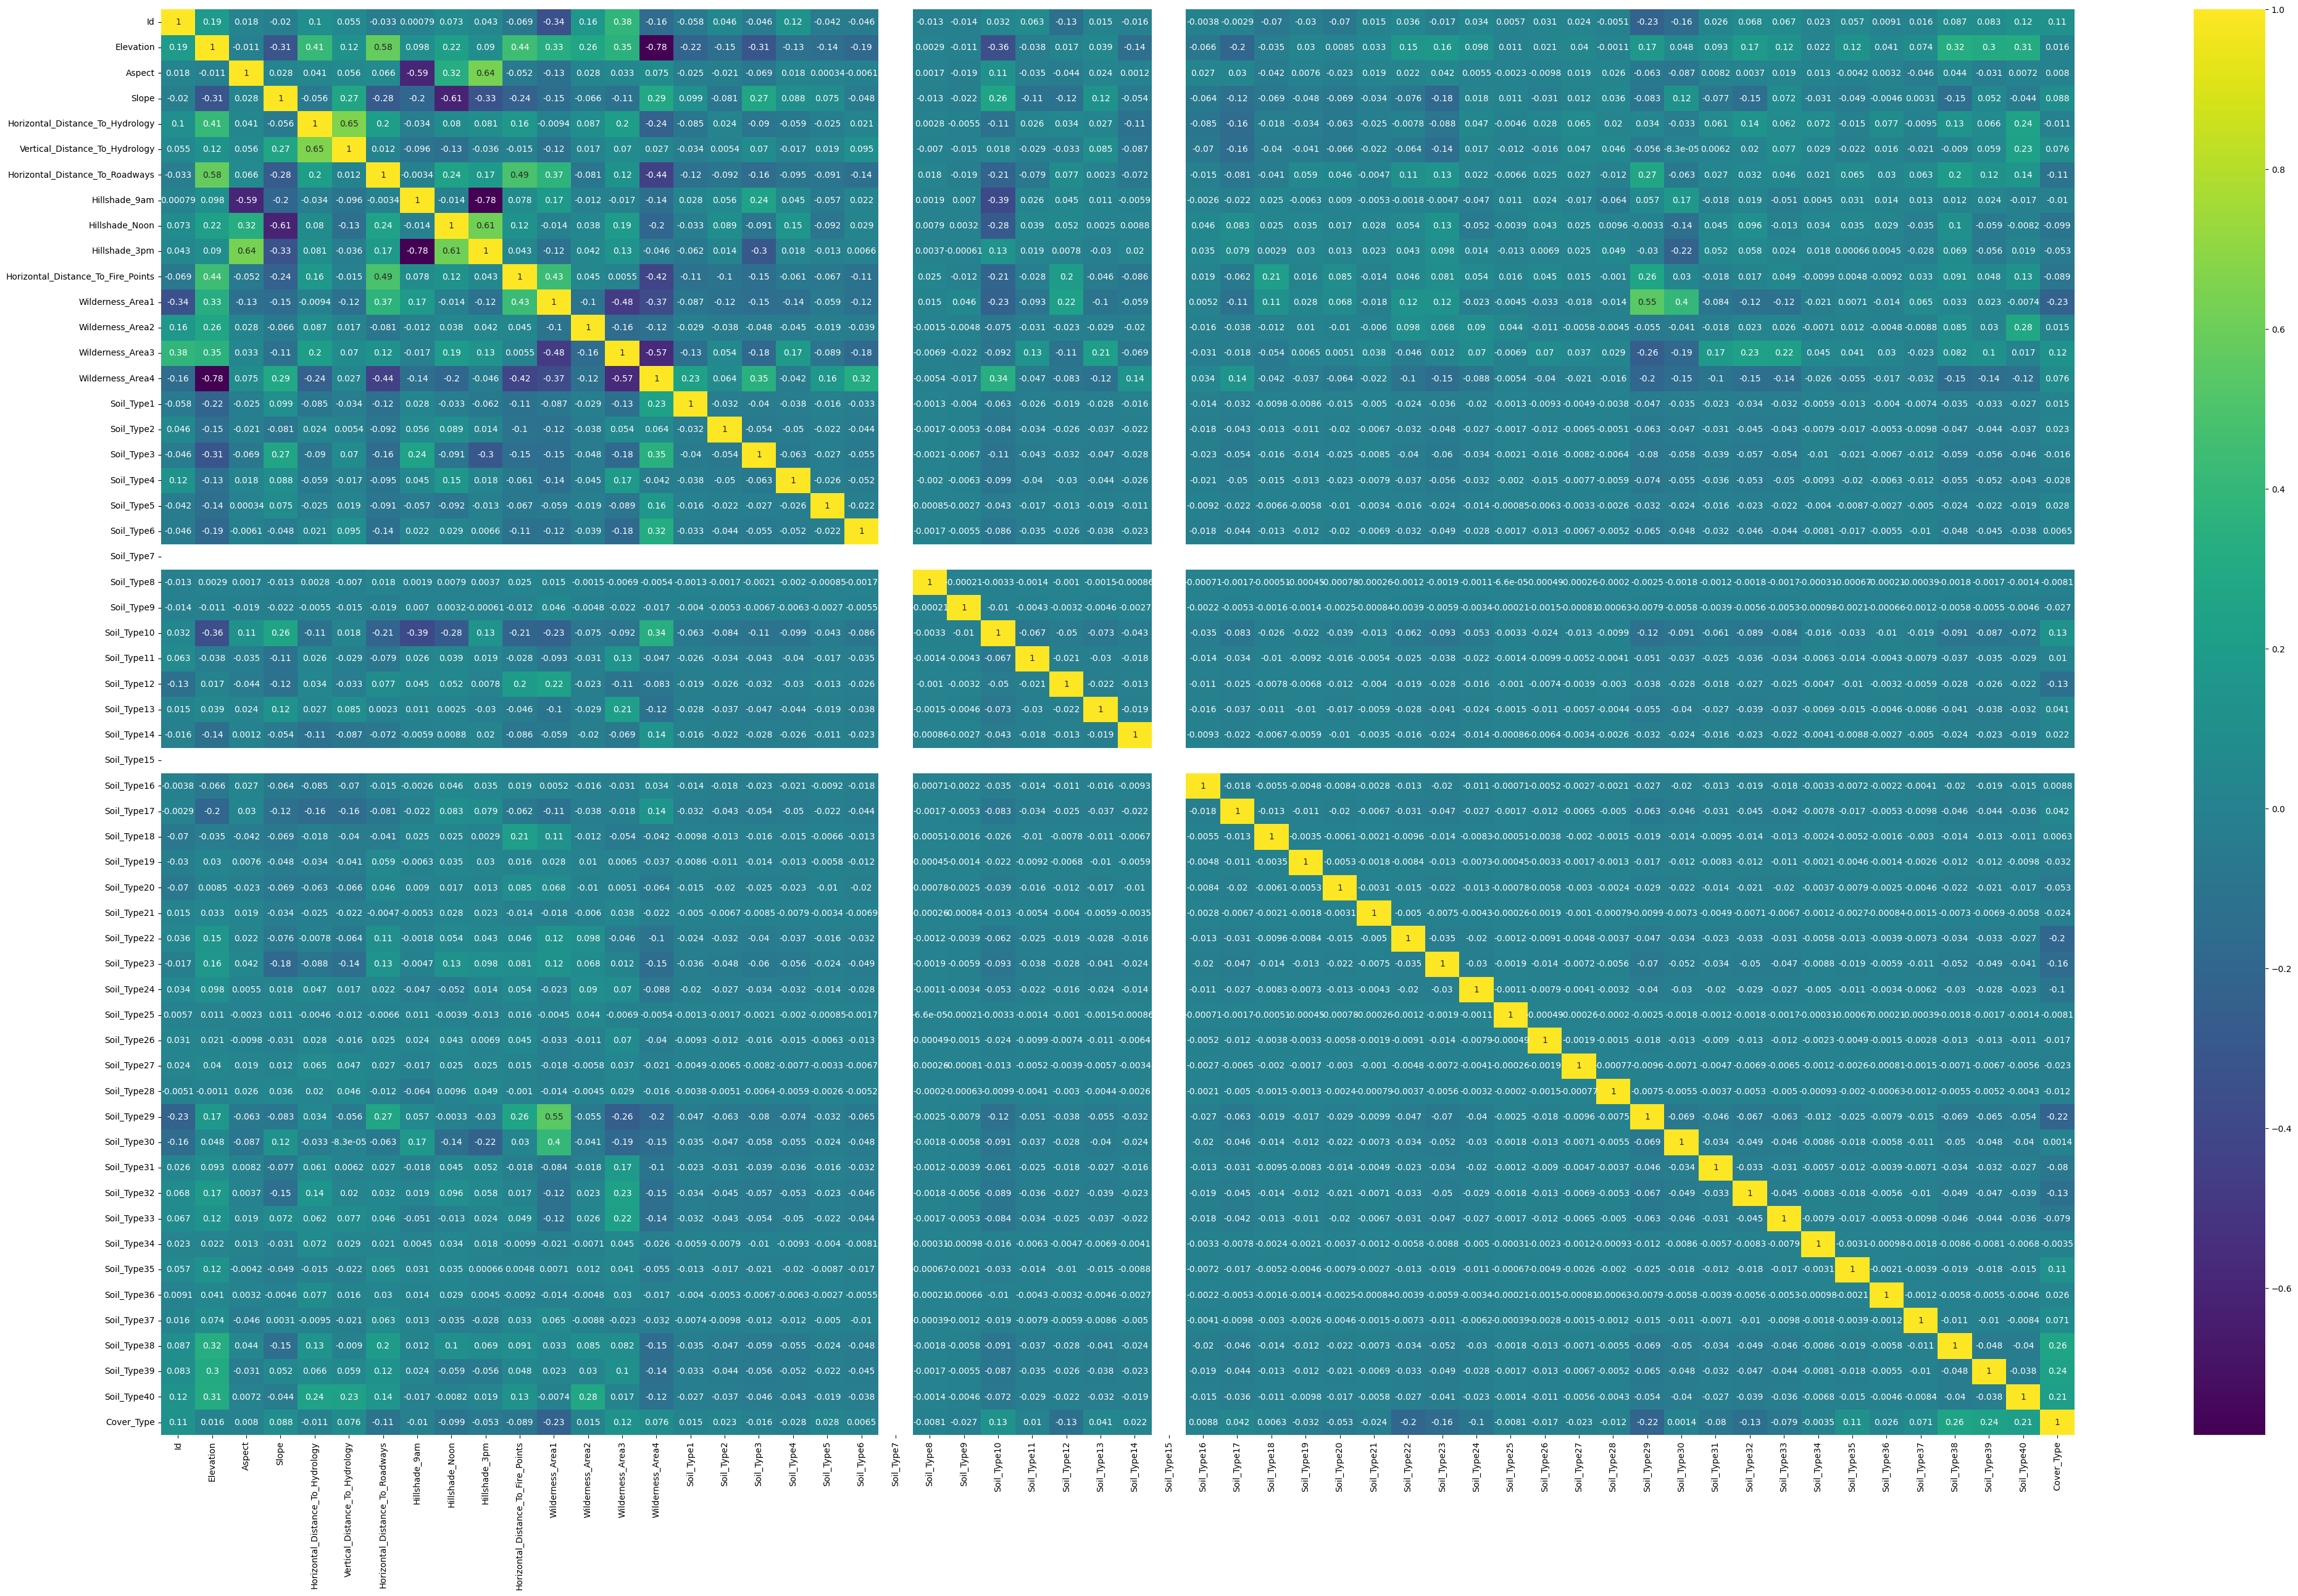

In [11]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis');

<Axes: xlabel='Horizontal_Distance_To_Fire_Points'>

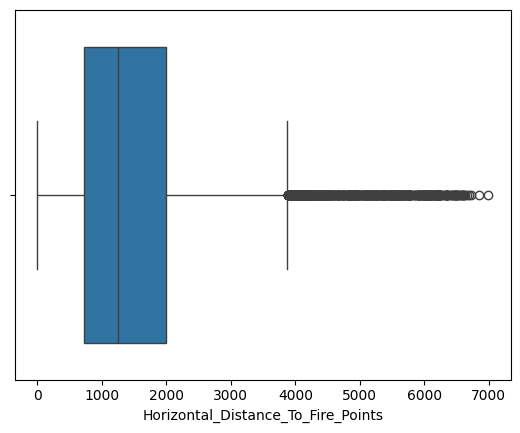

In [12]:
sns.boxplot(x=df['Horizontal_Distance_To_Fire_Points'])

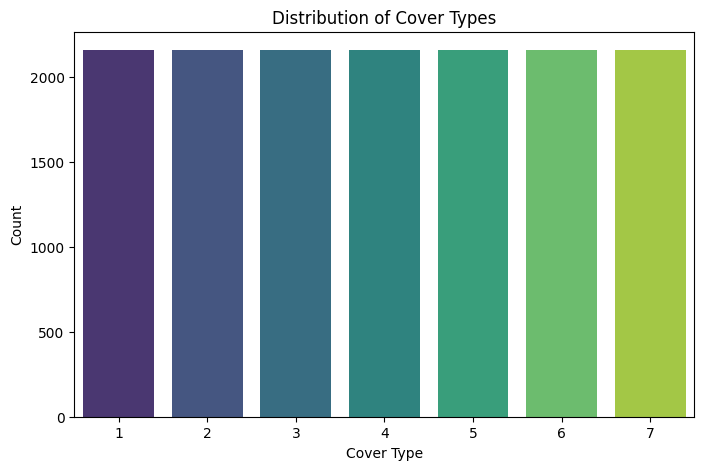

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cover_Type'], palette='viridis')
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Distribution of Cover Types")
plt.show()

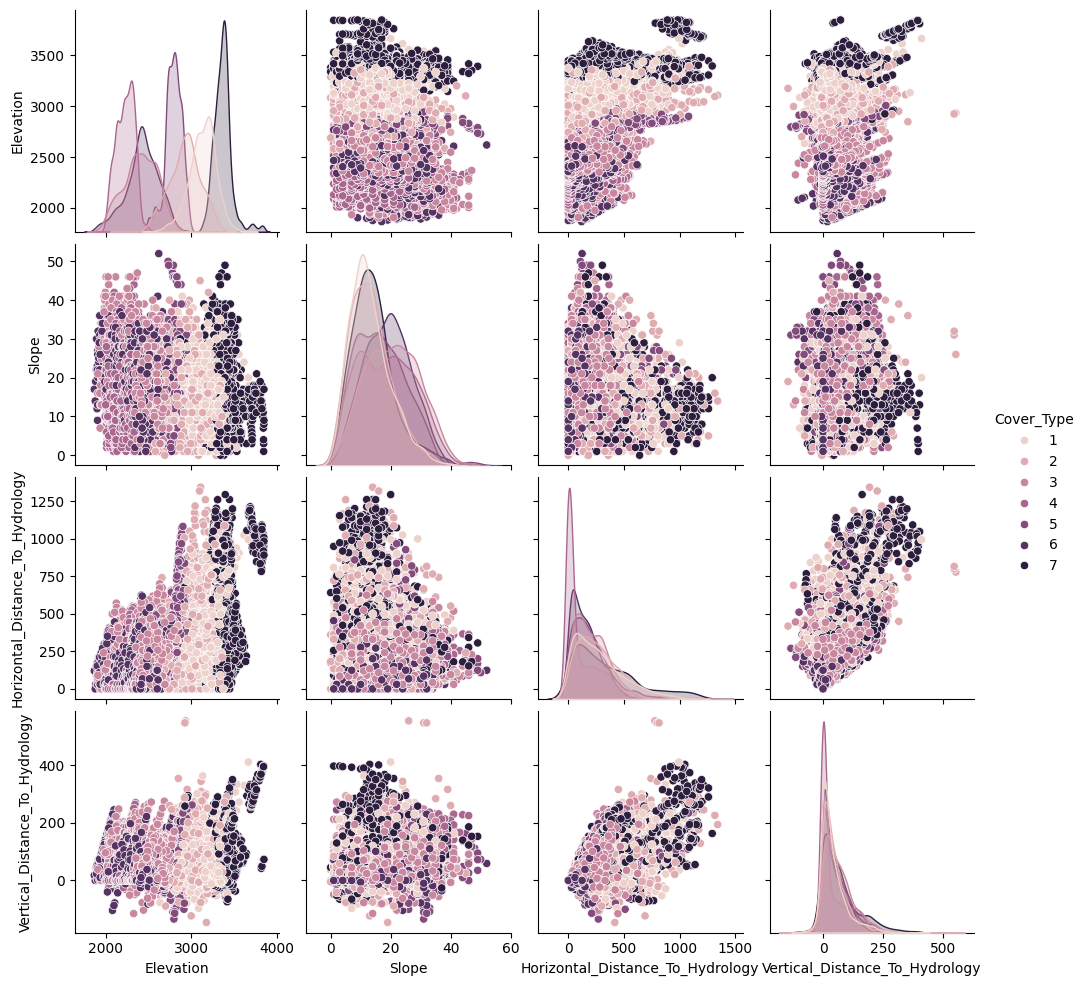

In [14]:
sns.pairplot(df, hue="Cover_Type", vars=['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'])

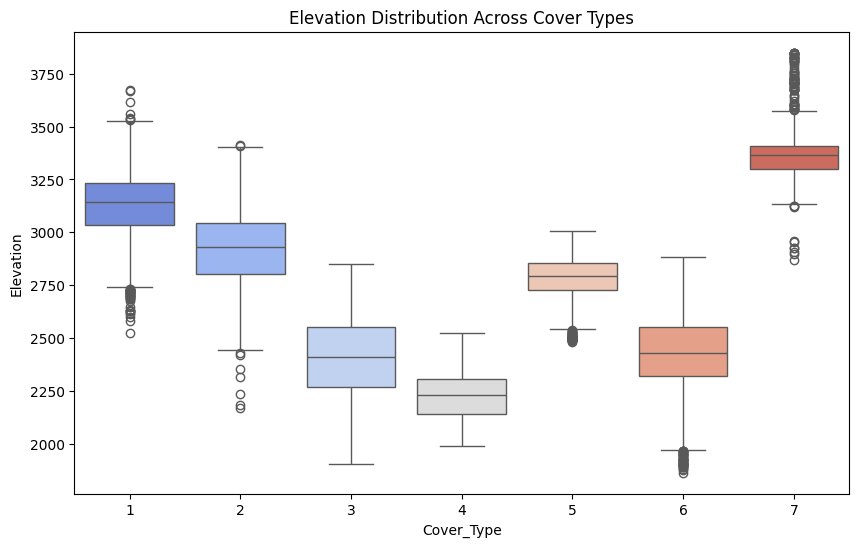

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette="coolwarm")
plt.title("Elevation Distribution Across Cover Types");


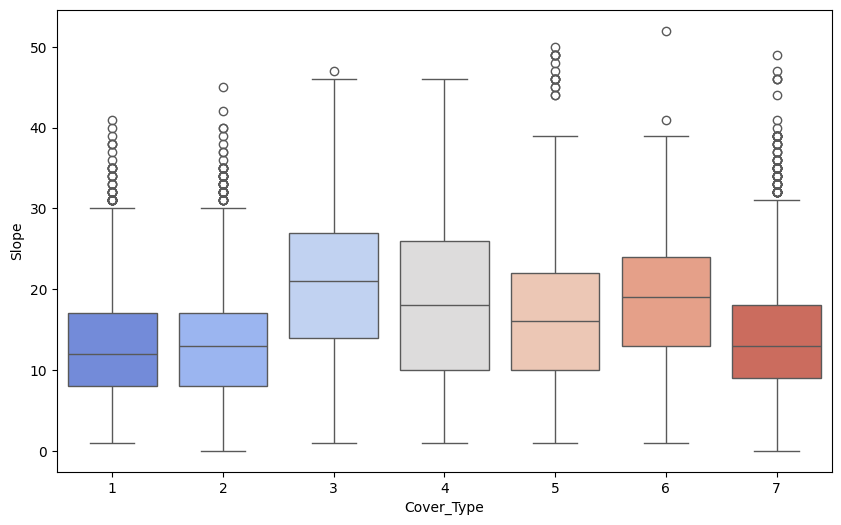

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Slope', data=df, palette="coolwarm");

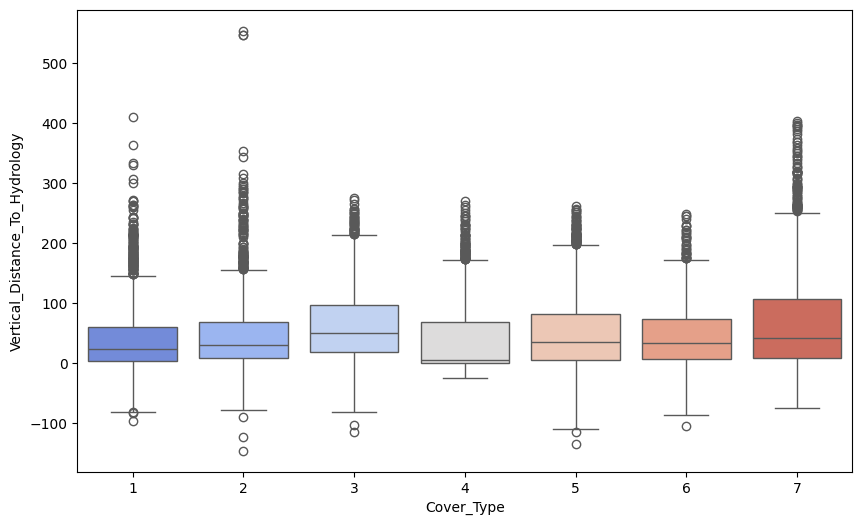

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Vertical_Distance_To_Hydrology', data=df, palette="coolwarm");

Feature Engineering

Outlier Analysis

In [18]:
upper_bound=df.quantile(q=.97,numeric_only=True)
lower_bound = df.quantile(q=.03,numeric_only=True)

In [19]:
df = df[(df['Horizontal_Distance_To_Fire_Points'] <= upper_bound['Horizontal_Distance_To_Fire_Points'])]

In [20]:
df.shape

(14666, 56)

In [21]:
abs(df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False))

Cover_Type                            1.000000
Soil_Type38                           0.255571
Soil_Type39                           0.242184
Soil_Type40                           0.205463
Soil_Type10                           0.121834
Soil_Type35                           0.114613
Wilderness_Area3                      0.100079
Id                                    0.088275
Slope                                 0.074099
Vertical_Distance_To_Hydrology        0.072847
Soil_Type37                           0.071479
Wilderness_Area4                      0.061165
Soil_Type17                           0.038251
Soil_Type13                           0.036902
Elevation                             0.027802
Soil_Type5                            0.025656
Soil_Type36                           0.025610
Wilderness_Area2                      0.024792
Soil_Type16                           0.021384
Soil_Type14                           0.019835
Soil_Type2                            0.017963
Soil_Type1   

Modelling with Conversational Models

In [22]:
x=df.drop(['Cover_Type','Id'],axis=1)
y=df[['Cover_Type']]

In [23]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["Cover_Type"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]

Confusion Matrix of Random Forest Classifier


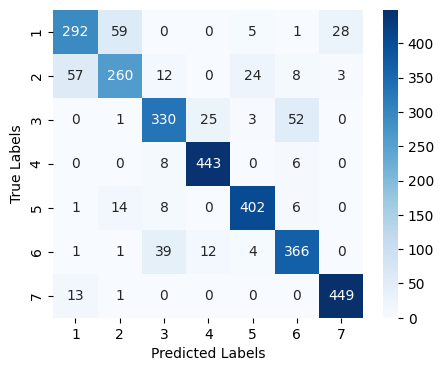

Confusion Matrix of KNeighbors Classifier


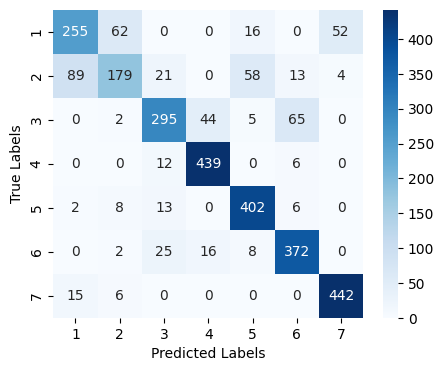

Confusion Matrix of Gradient Boosting Classifier


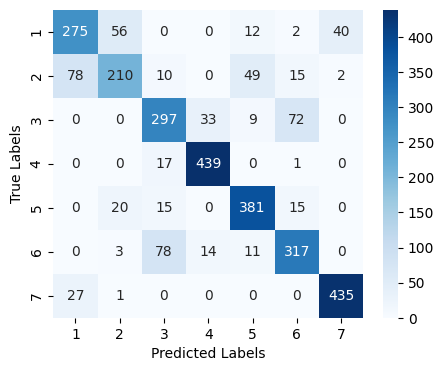

Confusion Matrix of Decision Tree Classifier


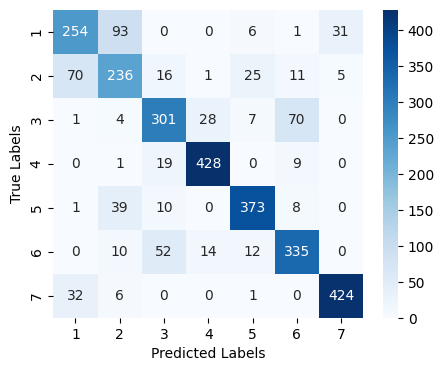

Confusion Matrix of Bernoulli NB


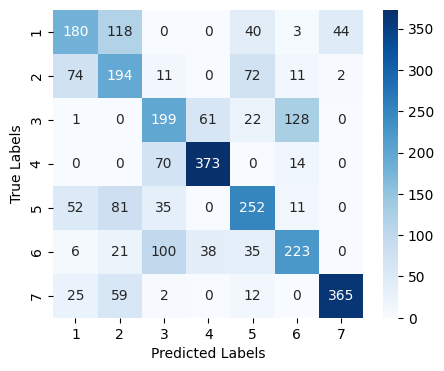

Confusion Matrix of Gaussian NB


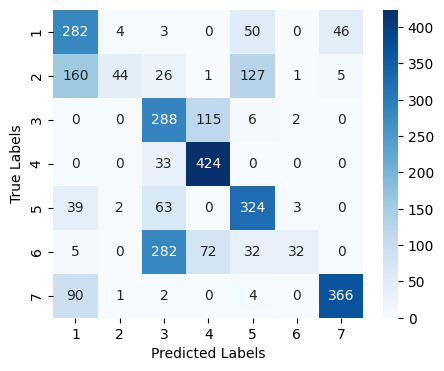

Confusion Matrix of Logistic Regression


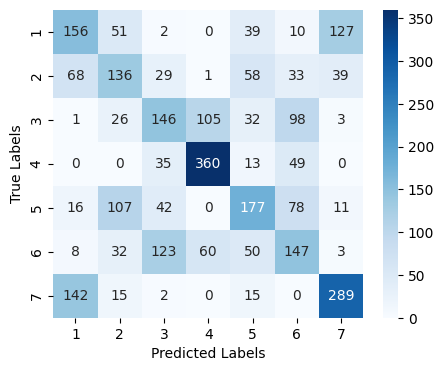

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       385
           2       0.77      0.71      0.74       364
           3       0.83      0.80      0.82       411
           4       0.92      0.97      0.95       457
           5       0.92      0.93      0.93       431
           6       0.83      0.87      0.85       423
           7       0.94      0.97      0.95       463

    accuracy                           0.87      2934
   macro avg       0.86      0.86      0.86      2934
weighted avg       0.86      0.87      0.86      2934

Classification Report of KNeighbors Classifier:
              precision    recall  f1-score   support

           1       0.71      0.66      0.68       385
           2       0.69      0.49      0.57       364
           3       0.81      0.72      0.76       411
           4       0.88      0.96      0.92       457
           5       0.82      0.93

,Accuracy Score
Random Forest Classifier,0.866394
KNeighbors Classifier,0.812543
Gradient Boosting Classifier,0.802318
Decision Tree Classifier,0.801295
Bernoulli NB,0.608725
Gaussian NB,0.599864
Logistic Regression,0.480913


In [24]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

Testing the Conversational Model

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
model1=rf.fit(x_train, y_train)

In [27]:
df_test=pd.read_csv(r'E:\project_2\working\forest_cover_prediction\train.csv')

In [ ]:
df_submission=pd.read_csv('/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv')

In [28]:
submission=pd.DataFrame({
    'Id':df_test['Id']}
)

In [29]:
df_test.drop('Id',axis=1,inplace=True)

In [30]:
predictions=model1.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cover_Type


In [ ]:
submission['Cover_Type']=predictions

In [ ]:
submission.to_csv("submission1.csv", index=False)

Modelling with Deep Learning

In [31]:
x=df.drop(['Cover_Type','Id'],axis=1)
y=df[['Cover_Type']]

In [32]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y['Cover_Type'])

In [33]:
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=42)

In [34]:
model2=Sequential()
model2.add(Dense(8, activation='relu'))
model2.add(Dense(32,activation='relu')) 
model2.add(Dense(64,activation='relu')) 
model2.add(Dense(128,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(7,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
x_train.shape,y_train.shape

((11732, 54), (11732,))

In [36]:
history=model2.fit(x_train,y_train,epochs=200,validation_split=.20,verbose=0)

In [ ]:
predictions=model2.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)
accuracy_score(predictions_labels,y_test)

Testing the Deep Learning Model